# My Data

**Name:** Ahmed Gamal Ahmed Mohamed

**College ID:** 20221459969

# Problem Statement

It's a Binary Classification Problem on Images Dataset representing brain scans

*I* will work on 2 classes which are:
**No Tumor** (لا يوجد ورم)
**Pituitary** (الغدة النخامية)

I will use Convolutional Neural Networks to solve this problem

# Importing Libraries

In [ ]:
# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
from PIL import Image

from google.colab import files
import pathlib
import shutil

from sklearn.metrics import confusion_matrix

# Data Loading

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('Ahmed Gamal uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
Ahmed Gamal uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d datasets/dqmonn/zalando-store-crawl

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:07<00:00, 22.1MB/s]
100% 149M/149M [00:07<00:00, 19.6MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip -d brains

Streaming output truncated to the last 5000 lines.
  inflating: brains/Training/glioma/Tr-gl_0712.jpg  
  inflating: brains/Training/glioma/Tr-gl_0713.jpg  
  inflating: brains/Training/glioma/Tr-gl_0714.jpg  
  inflating: brains/Training/glioma/Tr-gl_0715.jpg  
  inflating: brains/Training/glioma/Tr-gl_0716.jpg  
  inflating: brains/Training/glioma/Tr-gl_0717.jpg  
  inflating: brains/Training/glioma/Tr-gl_0718.jpg  
  inflating: brains/Training/glioma/Tr-gl_0719.jpg  
  inflating: brains/Training/glioma/Tr-gl_0720.jpg  
  inflating: brains/Training/glioma/Tr-gl_0721.jpg  
  inflating: brains/Training/glioma/Tr-gl_0722.jpg  
  inflating: brains/Training/glioma/Tr-gl_0723.jpg  
  inflating: brains/Training/glioma/Tr-gl_0724.jpg  
  inflating: brains/Training/glioma/Tr-gl_0725.jpg  
  inflating: brains/Training/glioma/Tr-gl_0726.jpg  
  inflating: brains/Training/glioma/Tr-gl_0727.jpg  
  inflating: brains/Training/glioma/Tr-gl_0728.jpg  
  inflating: brains/Training/glioma/Tr-gl_0729.j

In [ ]:
brains_train_dir = '/content/brains/Training'
brains_test_dir = '/content/brains/Testing'

In [ ]:
brains_train_dir = pathlib.Path(brains_train_dir)
brains_train_dir

PosixPath('/content/brains/Training')

In [ ]:
brains_test_dir = pathlib.Path(brains_test_dir)
brains_test_dir

PosixPath('/content/brains/Testing')

# Data Exploration and Visualization

In [ ]:
# Delete glioma and meningioma folders from training directory
shutil.rmtree(brains_train_dir / 'glioma', ignore_errors=True)
shutil.rmtree(brains_train_dir / 'meningioma', ignore_errors=True)

# Delete glioma and meningioma folders from testing directory
shutil.rmtree(brains_test_dir / 'glioma', ignore_errors=True)
shutil.rmtree(brains_test_dir / 'meningioma', ignore_errors=True)

In [ ]:
print("5 Paths from training directory - No Tumor Class")
list(brains_train_dir.glob('notumor/*.jpg'))[:5]

5 Paths from training directory - No Tumor Class


[PosixPath('/content/brains/Training/notumor/Tr-no_1152.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_1030.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_1486.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_0516.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_0731.jpg')]

In [ ]:
notumor_all_images = list(brains_train_dir.glob('notumor/*')) + list(brains_test_dir.glob('notumor/*'))
pituitary_all_images = list(brains_train_dir.glob('pituitary/*')) + list(brains_test_dir.glob('pituitary/*'))

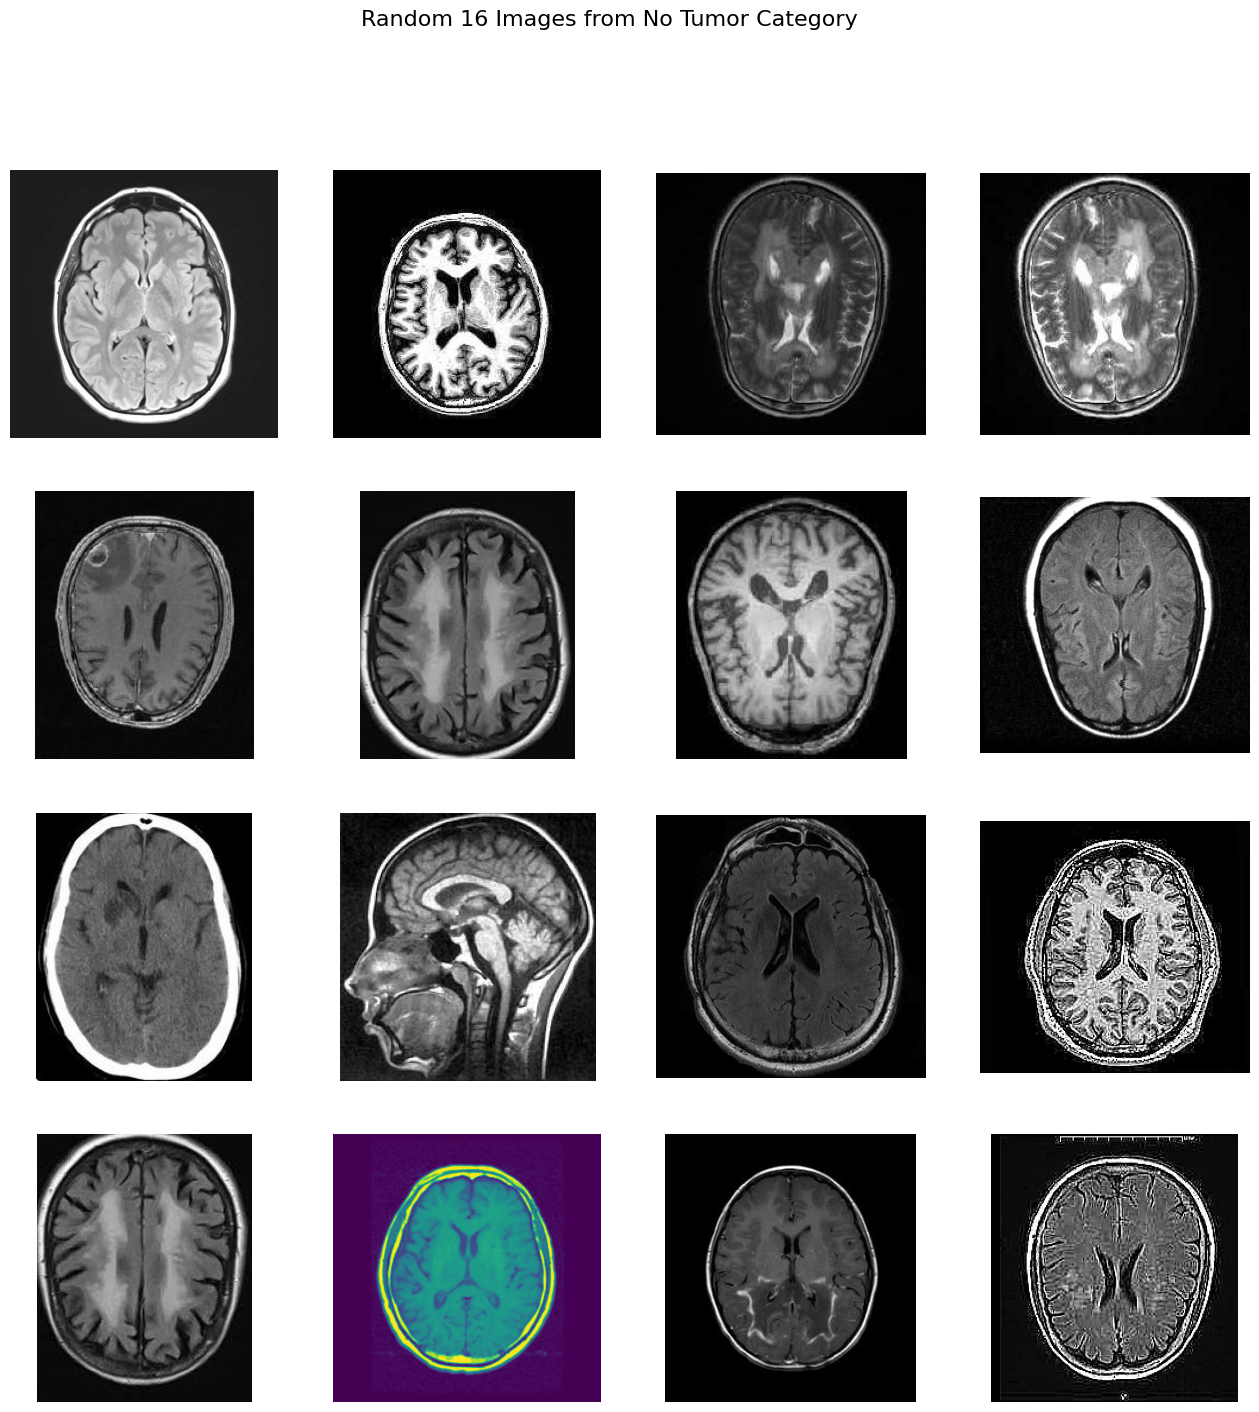

In [ ]:
random_images = random.sample(notumor_all_images, 16) # Select 16 random images from notumor_all_images

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Loop through the 16 images and display them
for i, ax in enumerate(axes.flat):
    img = Image.open(random_images[i])
    ax.imshow(img)
    ax.axis('off')

plt.suptitle('Random 16 Images from No Tumor Category', fontsize=16)

plt.show()

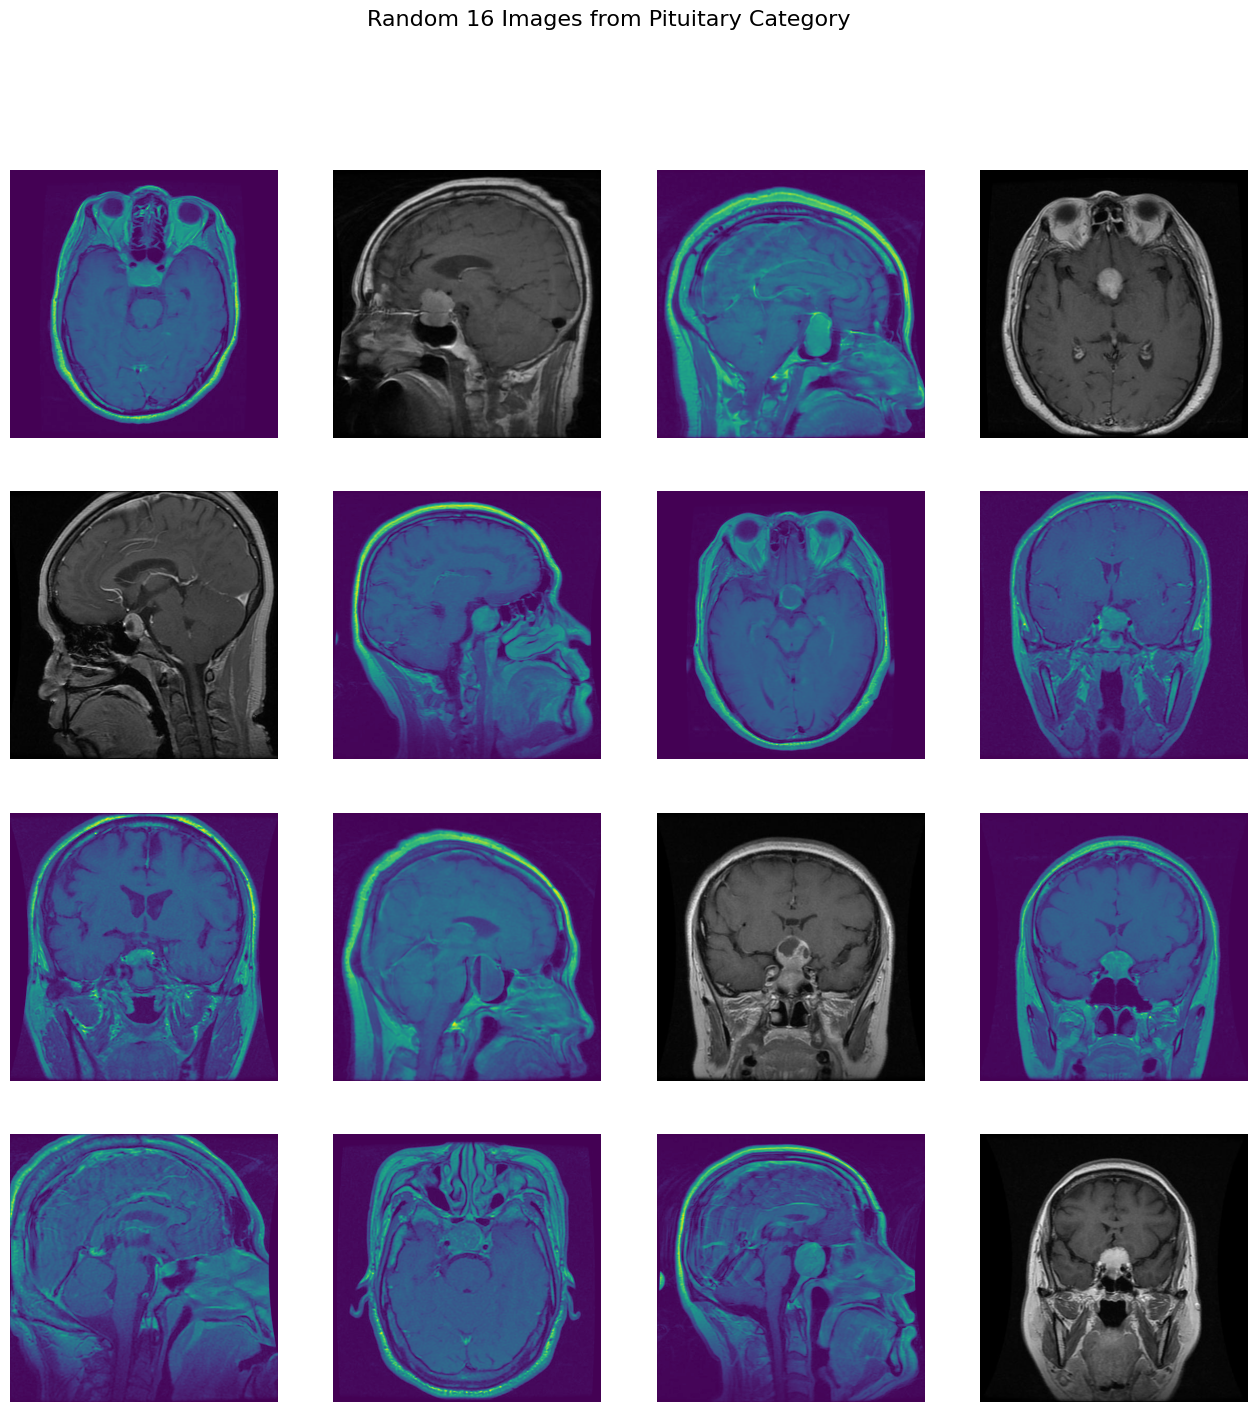

In [ ]:
random_images = random.sample(pituitary_all_images, 16) # Select 16 random images from pituitary_all_images

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Loop through the 16 images and display them
for i, ax in enumerate(axes.flat):
    img = Image.open(random_images[i])
    ax.imshow(img)
    ax.axis('off')

plt.suptitle('Random 16 Images from Pituitary Category', fontsize=16)

plt.show()

# Classes Distribution and Visualization

In [ ]:
train_notumor_count = len(list(brains_train_dir.glob('notumor/*.jpg')))
train_pituitary_count = len(list(brains_train_dir.glob('pituitary/*.jpg')))
test_notumor_count = len(list(brains_test_dir.glob('notumor/*.jpg')))
test_pituitary_count = len(list(brains_test_dir.glob('pituitary/*.jpg')))

total_train_count = train_notumor_count + train_pituitary_count
total_test_count = test_notumor_count + test_pituitary_count

total_notumor_count = train_notumor_count + test_notumor_count
total_pituitary_count = train_pituitary_count + test_pituitary_count

In [ ]:
print("Count of Training - No Tumor Images, ",train_notumor_count)
print("Count of Training - Pituitary Images, ",train_pituitary_count)
print("Count of Testing - No Tumor Images, ",test_notumor_count)
print("Count of Testing - Pituitary Images, ",test_pituitary_count)

Count of Training - No Tumor Images,  1595
Count of Training - Pituitary Images,  1457
Count of Testing - No Tumor Images,  405
Count of Testing - Pituitary Images,  300


In [ ]:
print("Total Count of Training Images, ",total_train_count)
print("Total Count of Testing Images, ",total_test_count)

Total Count of Training Images,  3052
Total Count of Testing Images,  705


In [ ]:
print("Total Count of No Tumor Images, ",total_notumor_count)
print("Total Count of Pituitary Images, ",total_pituitary_count)

Total Count of No Tumor Images,  2000
Total Count of Pituitary Images,  1757


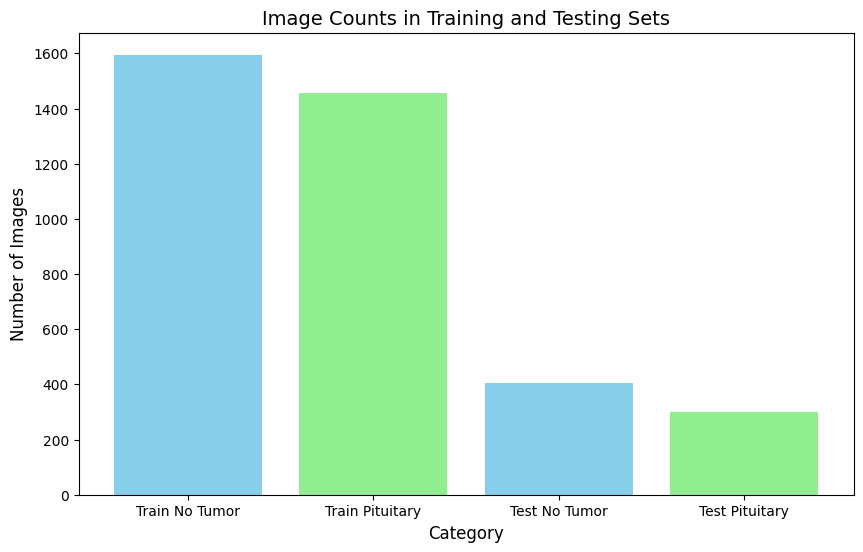

In [ ]:
categories = ['Train No Tumor', 'Train Pituitary', 'Test No Tumor', 'Test Pituitary']
counts = [train_notumor_count, train_pituitary_count, test_notumor_count, test_pituitary_count]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'skyblue', 'lightgreen'])

plt.title('Image Counts in Training and Testing Sets', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

plt.show()

# Data Preprocessing

In [ ]:
brains_images_train_dict = {
    'notumor': list(brains_train_dir.glob('notumor/*')),
    'pituitary': list(brains_train_dir.glob('pituitary/*'))
}

brains_images_test_dict = {
    'notumor': list(brains_test_dir.glob('notumor/*')),
    'pituitary': list(brains_test_dir.glob('pituitary/*'))
}

In [ ]:
brains_labels_dict = {
    'notumor': 0,
    'pituitary': 1
}

In [ ]:
print("5 Paths from training directory - No Tumor Class")
brains_images_train_dict['notumor'][:5]

5 Paths from training directory - No Tumor Class


[PosixPath('/content/brains/Training/notumor/Tr-no_1152.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_1030.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_1486.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_0516.jpg'),
 PosixPath('/content/brains/Training/notumor/Tr-no_0731.jpg')]

## Images Resizing

In [ ]:
# Applying resizing on training images and saving them in X_train and y_train

X_train, y_train = [], []

for brain_category, images in brains_images_train_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X_train.append(resized_img)
        y_train.append(brains_labels_dict[brain_category])

print("Number of images in X_train: ", len(X_train))
print("Number of labels in y_train: ", len(y_train))
print("Total Number of Training Images: ",total_train_count)

Number of images in X_train:  3052
Number of labels in y_train:  3052
Total Number of Training Images:  3052


In [ ]:
# Applying resizing on testing images and saving them in X_test and y_test

X_test, y_test = [], []

for brain_category, images in brains_images_test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X_test.append(resized_img)
        y_test.append(brains_labels_dict[brain_category])

print("Number of images in X_test: ", len(X_test))
print("Number of labels in y_test: ", len(y_test))
print("Total Number of Testing Images: ",total_test_count)

Number of images in X_test:  705
Number of labels in y_test:  705
Total Number of Testing Images:  705


In [ ]:
# Converting from Lists to Numpy Arrays

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3052, 180, 180, 3)
Shape of y_train:  (3052,)
Shape of X_test:  (705, 180, 180, 3)
Shape of y_test:  (705,)


## Image Normalization

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomTranslation(0.3, 0.3)
  ]
)

# CNN Model

In [ ]:
model = Sequential([
  layers.Input(shape=(180,180,3)),
  data_augmentation,
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1,activation='sigmoid') # Using sigmoid activation function instead of softmax because it's binary classification problem
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(), # Binary Crossentropy is the best for binary classification problem
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │         495,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,697 (2.01 MB)

 Trainable params: 525,697 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.5512 - loss: 0.6527
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.8116 - loss: 0.4315
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8723 - loss: 0.3244
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8667 - loss: 0.3315
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8740 - loss: 0.3120
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8782 - loss: 0.2971
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.8966 - loss: 0.2706
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9107 - loss: 0.2457
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9122 - loss: 0.2437
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9105 - loss: 0.2346


# Model Evaluation

In [ ]:
test_acc = model.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9680 - loss: 0.0985


In [ ]:
train_acc = history.history['accuracy']

In [ ]:
train_accuracy = train_acc[9] * 100  # Convert to percentage
test_accuracy = test_acc[1] * 100    # Convert to percentage

print(f"Model Training Accuracy = {train_accuracy:.2f}%")
print(f"Model Test Accuracy = {test_accuracy:.2f}%")

Model Training Accuracy = 91.64%
Model Test Accuracy = 96.17%


# Confussion Matrix

In [ ]:
predictions = model.predict(X_test)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[4.37735217e-08],
       [1.30509129e-02],
       [1.85730308e-02],
       [3.22174653e-02],
       [1.39922506e-07],
       [5.26191555e-02],
       [3.50900431e-04],
       [2.73971236e-04],
       [6.97149569e-03],
       [5.27040055e-03],
       [1.22832675e-02],
       [8.18024650e-02],
       [1.86327654e-07],
       [1.35967368e-02],
       [5.23729660e-02],
       [1.25611216e-01],
       [1.39522803e-04],
       [5.19721985e-01],
       [4.62956014e-05],
       [1.68415178e-02],
       [7.58457091e-03],
       [3.81019316e-03],
       [7.99160376e-02],
       [1.87794968e-01],
       [2.91653275e-02],
       [2.68567562e-01],
       [1.96530279e-02],
       [1.93041714e-03],
       [7.04694685e-08],
       [5.63715026e-02],
       [2.21170019e-03],
       [7.61990123e-06],
       [3.83132719e-05],
       [2.77768049e-05],
       [7.33242810e-01],
       [3.87835279e-02],
       [2.45776810e-02],
       [9.02117882e-03],
       [1.45010510e-02],
       [2.44934135e-03],


In [ ]:
predictions = np.round(predictions).flatten().astype(int)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cm = confusion_matrix(y_test, predictions)
show = pd.DataFrame(cm,columns=["pred_yes","pred_no"],index=["actual_yes","actual_no"])
show

,pred_yes,pred_no
actual_yes,391,14
actual_no,13,287


# Model Summary

The model had Training Accuracy = 91.64% and Testing Accuracy = 96.17%

It's not common to have test accuracy higher than training accuracy

After research, i found that one of the possible reasons to this is maybe because of the small size of the testing data and that is true in this problem's case having only 705 images in test dataset representing about only 18% of the total images in my dataset

So, a possible solution is to redefine the training and testing images by combining both of them and use train_test_split instead of just working with the predefined split used in the dataset from kaggle

But, In General, i found that it is not a big problem since i already have high training accuracy and getting high accuracy in testing is an indicator that i don't have overfitting